In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
from googletrans import Translator
DataRe = pd.read_csv("reviews.csv")

In [2]:
DataRe

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [3]:
DataRe.info

<bound method DataFrame.info of        listing_id        id        date  reviewer_id reviewer_name  \
0         1178162   4724140  2013-05-21      4298113       Olivier   
1         1178162   4869189  2013-05-29      6452964     Charlotte   
2         1178162   5003196  2013-06-06      6449554     Sebastian   
3         1178162   5150351  2013-06-15      2215611        Marine   
4         1178162   5171140  2013-06-16      6848427        Andrew   
...           ...       ...         ...          ...           ...   
68270     7462268  80537457  2016-06-18     22034145       Antonio   
68271     7462268  83640094  2016-07-03     40052513         Steve   
68272     7462268  85797088  2016-07-13     77129134          Nick   
68273     7462268  97264637  2016-08-26     15799803           Vid   
68274     7462268  98550693  2016-08-31     90128094       Arianna   

                                                comments  
0      My stay at islam's place was really cool! Good...  
1      Gr

In [4]:
DataRe.dropna(inplace=True)

In [12]:
def translater(text):
    target_language = "en"
    translator = Translator()
    translation = translator.translate(text, dest=target_language)
    return translation.text

def clean_comment(text):
    #翻译一直timeout报错，先停一停1晚点想办法
#     text = translater(text)
    text = re.sub(r"[^\w\s]", "", text).lower()
    tokens = text.split()
    stopwords = ["a", "an", "the", "and", "but", "if", "or", "because", "as", "what", "which", "this", "that", "these", "those", "then", "just", "so", "than", "such", "both", "through", "about", "for", "is", "of", "while", "during", "to", "What", "Which", "Who", "How", "Whom", "The"]
    tokens = [token for token in tokens if token not in stopwords]
    
    # Return the cleaned and preprocessed review text
    return " ".join(tokens)


In [13]:
ReClean = DataRe
ReClean["comments"] = ReClean["comments"].apply(clean_comment)

Training data from https://www.kaggle.com/datasets/harmanpreet93/hotelreviews

In [14]:
import pandas as pd
data = pd.read_csv( 'LYTToTrain.csv')
data

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [29]:
data["Description"] = data["Description"].apply(clean_comment)

In [30]:
data['Is_Response'].groupby(data['Is_Response']).count()

Is_Response
happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [31]:
data['label'] = data['Is_Response'].apply(
    lambda x: 1 if str(x) =='happy' else 0)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_processed = tfidf.fit_transform(data['Description'])

In [49]:
print(X_processed[0])

  (0, 39527)	0.1748325638479286
  (0, 5995)	0.15273259508396697
  (0, 23116)	0.13086006535638778
  (0, 7291)	0.10848437342961596
  (0, 49010)	0.1381560704365985
  (0, 45002)	0.14176195800235017
  (0, 1020)	0.11419837327641459
  (0, 55608)	0.15370083844707072
  (0, 12769)	0.2409238572443468
  (0, 65672)	0.09250283828712239
  (0, 23833)	0.3492385763639349
  (0, 59575)	0.14494264658863107
  (0, 39473)	0.08112041502234216
  (0, 66260)	0.1987848788856717
  (0, 55552)	0.08223577342607534
  (0, 41481)	0.2473781117788233
  (0, 40286)	0.1857036018442622
  (0, 3965)	0.20743669749398447
  (0, 5778)	0.24315647255965417
  (0, 24211)	0.2535071223281692
  (0, 17015)	0.30020794250689403
  (0, 53555)	0.22543926948519186
  (0, 56321)	0.283815022304717
  (0, 62932)	0.07458028987532916
  (0, 25840)	0.08174267964155583
  (0, 10939)	0.09717195747132393
  (0, 31777)	0.1990842009928801
  (0, 63854)	0.17185542238990784
  (0, 49424)	0.06687335472493984


In [56]:
x_train, x_test,y_train, y_test = train_test_split(
    X_processed, data['label'], test_size=0.2, random_state=1)

In [55]:
print(x_test)

32926    1
26479    1
23856    1
1470     0
12593    1
        ..
7813     1
32511    1
5192     0
12172    0
33003    1
Name: label, Length: 31145, dtype: int64


In [59]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
own_model = MultinomialNB()

%time own_model.fit(x_train, y_train)
own_model_result = own_model.predict(x_test)


Wall time: 20 ms


In [60]:
from sklearn import metrics
print(metrics.classification_report(y_test, own_model_result))

              precision    recall  f1-score   support

           0       0.97      0.30      0.46      2518
           1       0.75      1.00      0.85      5269

    accuracy                           0.77      7787
   macro avg       0.86      0.65      0.66      7787
weighted avg       0.82      0.77      0.73      7787



In [63]:
data_text = tfidf.transform(ReClean['comments'])
%time ReClean['score'] = [round(i[1], 5) for i in own_model.predict_proba(data_text)]

Wall time: 283 ms


In [66]:
score_id = ReClean[['listing_id', 'score']].groupby('listing_id')
score_id = score_id.agg(np.mean
print(score_id)

               score
listing_id          
3353        0.881073
5506        0.951443
6695        0.940801
6976        0.932311
8792        0.943669
...              ...
14813006    0.996540
14823724    0.950980
14842237    0.641180
14843050    0.748320
14843783    0.844950

[2829 rows x 1 columns]


In [73]:
score_id.nlargest(3, "score")


,score
listing_id,
14813006,0.99654
7513906,0.99482
13655073,0.99477


In [74]:
score_id.nsmallest(3, "score")

,score
listing_id,
1867754,0.12983
12709469,0.13003
13236936,0.14269


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
topn = 500
count_extract = CountVectorizer(max_features=topn)
count_extract.fit_transform(ReClean["comments"])

comment_count_pair = [(k, int(v))
                      for k, v in count_extract.vocabulary_.items()]

In [102]:
comment_count_pair = [word for word in comment_count_pair if word[0] not in ('us','no','within','etc', 'without', 'were', 'en', 'use','youre', 'your', 'who', 'will', 'you', "the", "be", "to", "of", "and", "a", "in", "that", "have", "I", "it", "for", "not", "on", "with", "he", "as", "you", "do", "at", "this", "but", "his", "by", "from", "they", "we", "say", "her", "she", "or", "an", "will", "my", "one", "all", "would", "there", "their", "what", "so", "up", "out", "if", "about", "who", "get", "which", "go", "me")
]


In [103]:
from pyecharts.charts import WordCloud
from pyecharts import options as opts

comment_wordcloud = WordCloud()
comment_wordcloud.add(
    series_name="", data_pair=comment_count_pair, word_size_range=[10, 100], shape="circle")
comment_wordcloud.set_global_opts(
    title_opts=opts.TitleOpts(title="Word Cloud",
                              title_textstyle_opts=opts.TextStyleOpts(font_size=15)),
    tooltip_opts=opts.TooltipOpts(is_show=True),
)
comment_wordcloud.render_notebook()

### How to become a super host

In [16]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#load the data
list = pd.read_csv('listings.csv')

In [3]:
# check the data type of the columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # show all contents in a series
    print(list.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [4]:
#Drop id and other columns unrelated to the business questions
list = list.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about','host_thumbnail_url','host_picture_url', 'host_neighbourhood', 
       'host_total_listings_count', 'host_verifications','host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street','neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'amenities', 
       'security_deposit','guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated','calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review','requires_license',
       'license', 'jurisdiction_names','instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'], axis=1)

In [6]:
#filter data to view characteristics of a super host
list[list.host_is_superhost== 't']

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,neighbourhood,accommodates,bathrooms,bedrooms,beds,bed_type,...,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2,within a few hours,100%,88%,t,Roslindale,2,1.0,1.0,1.0,Real Bed,...,46,61,319,98.0,10.0,9.0,10.0,10.0,9.0,10.0
4,within an hour,100%,100%,t,Roslindale,2,1.5,1.0,2.0,Real Bed,...,34,59,334,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,within a few hours,100%,95%,t,Roslindale,2,1.0,1.0,1.0,Real Bed,...,28,58,58,100.0,10.0,10.0,10.0,10.0,9.0,10.0
7,within a few hours,100%,100%,t,Roslindale,2,2.0,1.0,1.0,Real Bed,...,60,90,365,96.0,10.0,10.0,10.0,10.0,10.0,10.0
8,within an hour,100%,100%,t,Roslindale,2,1.0,1.0,2.0,Real Bed,...,42,72,347,96.0,10.0,10.0,10.0,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,within an hour,100%,100%,t,Allston-Brighton,2,1.0,1.0,1.0,Real Bed,...,0,0,14,98.0,10.0,10.0,10.0,10.0,10.0,10.0
3496,within a day,100%,77%,t,Allston-Brighton,2,1.0,1.0,1.0,Real Bed,...,39,69,69,95.0,10.0,10.0,10.0,10.0,10.0,9.0
3497,within an hour,100%,95%,t,Allston-Brighton,2,2.0,1.0,1.0,Real Bed,...,0,0,256,91.0,9.0,9.0,9.0,9.0,9.0,9.0
3501,within an hour,100%,95%,t,Allston-Brighton,2,2.0,1.0,1.0,Real Bed,...,9,38,313,90.0,9.0,9.0,10.0,10.0,9.0,9.0


In [9]:
#Create a list of columns that are related to examining the requirements for a superhost
SuperHost_req= list[['host_response_rate', 'host_acceptance_rate', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [10]:
#calculate the descriptive statistics for superhost requirement
SuperHost_req.describe()

,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3585.00000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000
mean,8.64993,21.833194,38.558159,179.346444,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234
std,10.43533,21.860966,33.158272,142.136180,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116
min,0.00000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,0.00000,0.000000,0.000000,19.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,4.00000,16.000000,37.000000,179.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,15.00000,40.000000,68.000000,325.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,30.00000,60.000000,90.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


The data suggests the following criteria for becoming a superhost:

Host guests for 179 days a year on average

On average, maintain a 95% response rate

Have an average of 92% 5-star reviews

Honor confirmed reservations 84% of the time

Have a guest rating of 9.7 for check-in and communication

Have a guest rating of 9.3 for cleanliness

Have a guest rating of 9.4 for accuracy and location

Have a guest rating of 9.2 for value

### User preferences, 


In [5]:
b_calendar = pd.read_csv('calendar.csv')

In [6]:
from pandas.api.types import CategoricalDtype

def sort_week_day(days):
    '''
    INPUT: 
    days: pandas column that contains only dates
    
    OUTPUT:
    week_day_sorted: pandas dataframe sorted by week day and dates frequency
    '''
    
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    cat_type = CategoricalDtype(categories=cats, ordered=True)
    week_day_sorted = pd.to_datetime(days[b_calendar.available == 'f']).dt.day_name().astype(cat_type)
    return week_day_sorted
    
only_dates = sort_week_day(b_calendar.date)

only_dates.value_counts()

Tuesday      96726
Friday       95474
Saturday     95404
Thursday     95270
Wednesday    94656
Sunday       94264
Monday       94059
Name: date, dtype: int64

Text(0, 0.5, 'Not available places')

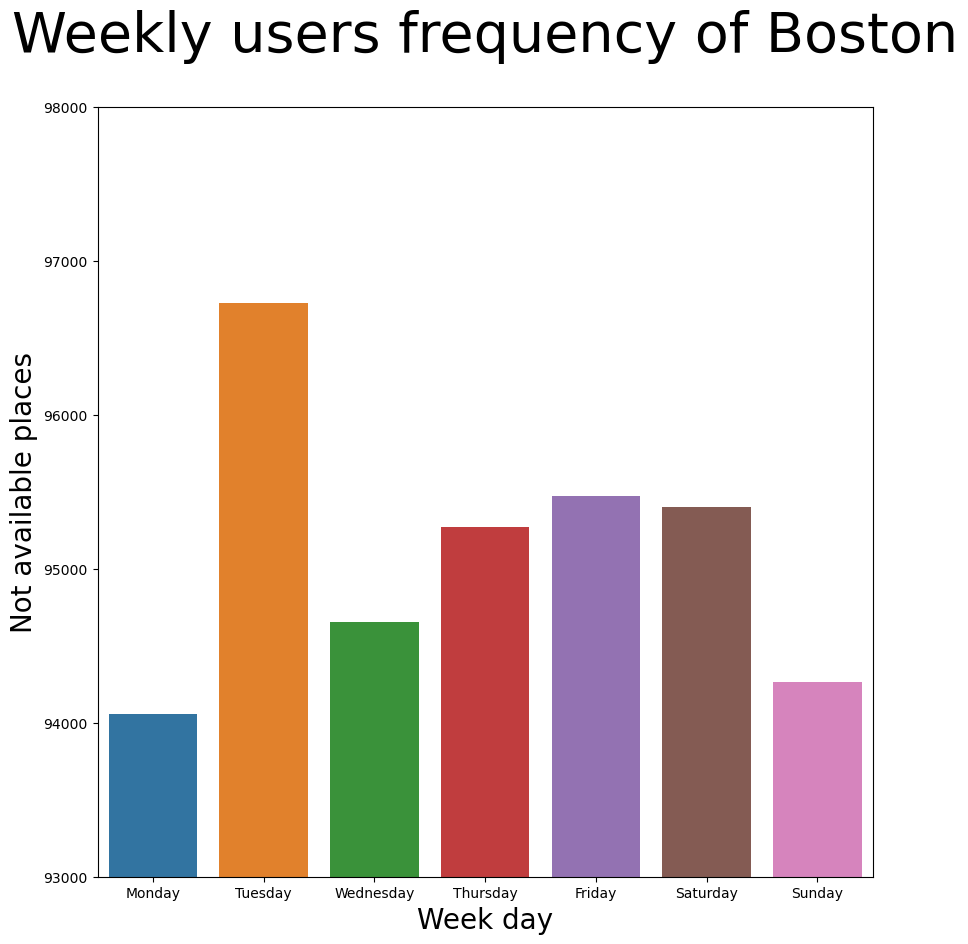

In [7]:
plt.figure(figsize=(10, 10))
sample_plot = sns.barplot(x=only_dates.value_counts().index, y=only_dates.value_counts())
sample_plot.set(ylim=(93000, 98000))
sample_plot.axes.set_title("Weekly users frequency of Boston", fontsize=40, pad=40)
sample_plot.set_xlabel("Week day",fontsize=20)
sample_plot.set_ylabel("Not available places",fontsize=20)
# environment error, check the data


### High season?

### What kind of listing is most pupular

In [18]:
features_df = list.copy()

In [19]:
features_df.review_scores_rating.unique()

array([ nan,  94.,  98., 100.,  99.,  90.,  96.,  80.,  97.,  91.,  95.,
        88.,  92.,  87.,  93.,  73.,  82.,  20.,  89.,  81.,  78.,  74.,
        60.,  86.,  85.,  75.,  79.,  70.,  83.,  64.,  84.,  40.,  68.,
        67.,  48.,  58.,  62.,  76.,  77.,  71.,  65.,  53.,  47.,  72.,
        46.,  50.,  66.,  69.,  55.])

In [15]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           3114 non-null   object 
 1   host_response_rate           3114 non-null   object 
 2   host_acceptance_rate         3114 non-null   object 
 3   host_is_superhost            3585 non-null   object 
 4   neighbourhood                3042 non-null   object 
 5   accommodates                 3585 non-null   int64  
 6   bathrooms                    3571 non-null   float64
 7   bedrooms                     3575 non-null   float64
 8   beds                         3576 non-null   float64
 9   bed_type                     3585 non-null   object 
 10  square_feet                  56 non-null     float64
 11  price                        3585 non-null   object 
 12  weekly_price                 892 non-null    object 
 13  monthly_price     

In [21]:
ratings_per_neighbourhood = features_df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [22]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed  property_type  
Downtown                Boat               100.0
Brighton                Loft               100.0
Charlestown             Entire Floor       100.0
Bay Village             Townhouse          100.0
                        Guesthouse         100.0
                                           ...  
Fenway                  Bed & Breakfast      NaN
Jamaica Plain           Entire Floor         NaN
Longwood Medical Area   Loft                 NaN
Roxbury                 Entire Floor         NaN
                        Loft                 NaN
Name: review_scores_rating, Length: 132, dtype: float64

Text(0.5, 1.0, 'Reviews based on neighbourhood and price')

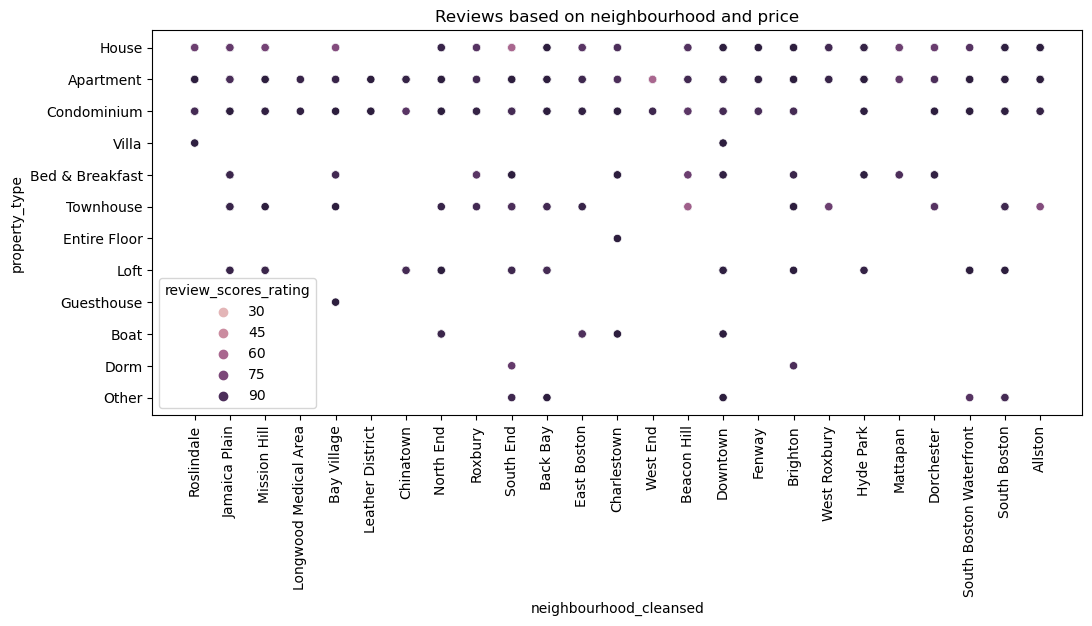

In [23]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=features_df)
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and price')

In [24]:
ratings_per_property_type = features_df.groupby('property_type').review_scores_rating.mean()

In [25]:
ratings_per_property_type

property_type
Apartment           91.514141
Bed & Breakfast     91.800000
Boat                91.454545
Camper/RV                 NaN
Condominium         94.451977
Dorm                86.500000
Entire Floor       100.000000
Guesthouse         100.000000
House               92.204593
Loft                96.312500
Other               88.111111
Townhouse           94.760870
Villa               99.500000
Name: review_scores_rating, dtype: float64

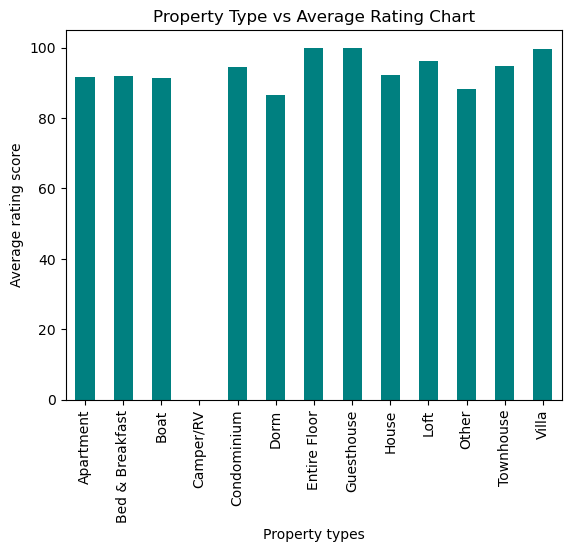

In [26]:
ratings_per_property_type.plot(kind='bar',color='teal');
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');